# Chapter 6. 결정 트리

SVM처럼 **결정 트리**(Decision Tree)는 분류와 회귀작업, 그리고 다중 출력 작업도 가능한 다재다능한 머신러닝 알고리즘입니다. 또한 매우 복잡한 데이터셋도 학습할 수 있는 강력한 알고리즘입니다. 

결정트리는 최근에 자주 사용되는 가장 강력한 머신러닝 알고리즘 중 하나인 랜덤 폴세스트의 기본 구성 요소이기도 합니다. 

이 장에서는 결정 트리의 훈련, 시각화, 예측 방법에 대해 먼저 살펴보겠습니다. 그런 다음 사이킷런의 CART 훈련 알고리즘을 둘러보고 트리에 규제를 가하는 방법과 회귀 문제에 적용하는 방법을 알압도ㅗ록 하겠습니다. 마지막으로 결정 트리의 제약 사항에 관해 이야기하겠습니다.

## 6.1 결정 트리 학습과 시각화

결정 트리를 이해하기 위해 일단 하나를 만들어서 어떻게 예측하는지 살펴보도록 하겠습니다.

아래는 붓꽃 데이터셋에 `DecisionTreeClassifier`를 만들어서 훈련시키는 코드입니다. 

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # 꽃잎의 길이와 너비
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

`export_graphviz()` 함수를 사용해 그래프의 정의를 iris_tree.dot 파일로 출력하여 훈련된 결정 트리를 시각화할 수 있습니다.

In [2]:
import os

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id)

In [3]:
from sklearn.tree import export_graphviz

f = open("./iris_tree.dot", "w")
export_graphviz(
    tree_clf,
    out_file = f,
    feature_names = iris.feature_names[2:],
    class_names = iris.target_names,
    rounded = True,
    filled = True
)
f.close()

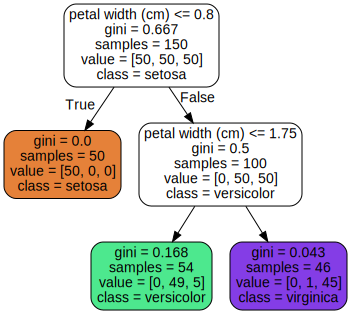

In [4]:
import graphviz

with open("./iris_tree.dot") as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename = "iris_tree", directory = ".", cleanup = True)
dot

## 6.2 예측하기

트리가 어떻게 예측을 만들어내는지 살펴봅시다.

새로 발견한 붓꽃의 품종을 분류한다고 가정햅보시다. 먼저 **루트 노드**(root node)에서 시작합니다. 이 노드는 꽃잎의 길이가 2.45cm 보다 짧은지 검사합니다. 만약 그렇다면 루트 노드에서 왼쪽의 자식 노드로 이동합니다. 이 경우 이 노드가 **리프 노드**(leaf node), 즉 추가적인 자식을 가지지 않는 노드이므로 추가적인 검사를 하지 않습니다. 

노드의 `sample` 속성은 얼마나 많은 훈련 샘플이 적용되었는지 헤아린 것입니다. 예를 들어 100개의 훈련 샘플의 꽃잎의 길이가 2.45cm보다 길고, 그 중 54개의 샘플의 꽃잎 너비가 1.75cm보다 짧습니다. 노드의 `value` 속성은 노드에서 각 클래스에 얼마나 많은 훈련 샘플이 있는지 알려줍니다. 

마지막으로 노드의 `gini` 속성은 **불순도**(impurity)를 측정합니다. 한 노드의 모든 샘플이 같은 클래스에 속해있다면 이 노드를 순수(`gini`=0)이라고 합니다. 예를 들어 깊이 1의 왼쪽 노드는 Iris-Setosa 훈련 샘플만 가지고 있으므로 순수 노드이고 `gini` 점수가 0입니다. $i$번째 노드의 `gini` 점수 `G_i`를 계산하는 방법은 아래와 같습니다.


$$ G_i = 1 - \sum^n_{k=1}{p_{i, k}}^{2} $$


사이킷런은 **이진 트리**만 만드는 CART 알고리즘을 사용합니다. 그러므로 리프 노드 외의 모든 노드는 자식 노드를 두개씩 가집니다. 하지만 ID3 같ㅇ든 알고리즘은 둘 이상의 자식 노드를 가진 결정 트리를 만들 수 있습니다.



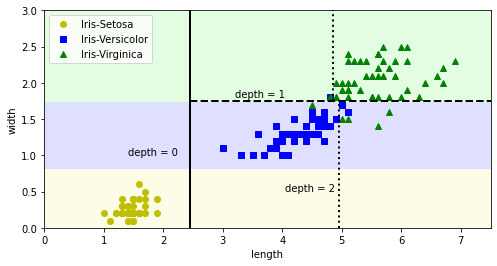

In [5]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes = [0, 7.5, 0, 3], iris=True, legend=False, plot_training = True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58', '#4c4c7f', '#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'yo', label='Iris-Setosa')
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'bs', label='Iris-Versicolor')
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], 'g^', label='Iris-Virginica')
        plt.axis(axes)
    if iris:
        plt.xlabel("length")
        plt.ylabel("width")
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc='lower right', fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], 'k-', linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], 'k--', linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], 'k:', linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], 'k:', linewidth=2)
plt.text(1.40, 1.0, "depth = 0")
plt.text(3.2, 1.8, "depth = 1")
plt.text(4.05, 0.5, "depth = 2")
plt.legend()

plt.show()

위 그림은 이 결정 트리의 결정 경계를 보여줍니다. 굵은 수직선이 루트 노드(깊이 0)의 결정 경계(꽃잎 길이 = 2.45cm)를 나타냅니다. 왼쪽 영역은 순수 노드(Iris-Setosa)이기 때문에 더이상 나눌 수 없습니다.

하지만 오른쪽 영역은 순수 노드가 아니므로 깊이 1의 오른쪽 노드는 꽃잎 너미 1.75cm에서 나누어집니다. `max_depth`를 2로 설정했기 때문에 결정 트리는 더이상 분할되지 않습니다. 하지만 `max_depth`를 3으로 하면 깊이 2의 두 노드가 각각 결정 경계를 추가로 만듭니다.

> 모델 해석 : 화이트 박스와 블랙 박스

여기에서 볼 수 있듯이 결정트리는 매우 직관적이고 결정 방식을 이해하기 쉽습니다. 이런 모델을 **화이트 박스**(white box)라고 합니다. 반대로 앞으로 보게 될 랜덤 포레스트나 신경망은 **블랙 박스**(black box)모델입니다. 이 알고리즘들은 뛰어나고 예측을 만드는 연산 과정을 쉽게 확인할 수 있습니다. 그렇지만 왜 그런 예측을 만드는지 쉽게 설명하기 어렵습니다. 


## 3. 클래스 확률 추정

결정 트리는 한 샘플이 특정 클래스 $k$에 속할 확률을 추정할수도 있습니다. 먼저 이 샘플에 대해 리프 노드를 찾기 위해 트리를 탐색하고 그 노드에 있는 클래스 $k$의 훈련 샘플의 비율을 반환합니다. 예를 들어 깊이가 5cm이고 너비가 1.5cm인 꽃잎을 발견했다고 가정합시다. 이에 해당하는 리프노드는 깊이 2에서 왼쪽 노드이므로 결정 트리는 그에 해당하는 확률을 출력합니다. 

한번 확인해봅시다.

In [6]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

Iris-Versicolor는 90%, Iris-Virginicasms 9.3%를 예측합니다! 

## 4. CART 훈련 알고리즘

사이킷런은 결정트리를 훈련시키기 위해 CART(Classification And Regression Tree)알고리즘을 사용합니다. 이 알고리즘의 아이디어는 매우 간단합니다.

먼저 훈련 세트를 하나의 특성 $k$의 임곗값 $t_k$를 사용해 두개의 서브셋으로 나눕니다. 어떻게 크기에 따라 가중치가 적용된 가장 순수한 서브셋으로 나눈ㄹ 수 있는 $(k, t_k)$ 이 알고리즘이 최소화해야하는 비용 함수는 아래와 같습니다.

$$ J(k, t_k) = \frac{m_{left}}{m}G_{left} + \frac{m_{right}}{m}G_{right} $$

(여기서 $G_{left/right}$는 왼쪽/오른쪽의 불순도, $m_{left/right}$는 왼쪽/오른쪽 서브셋의 샘플 수)

훈련 세트를 성공적으로 둘로 나누었다면 같은 방식으로 서브셋을 또 나누고 그 다음엔 서브셋의 서브셋을 나누고 이런식으로 반복합니다. 이 과정은 최대 깊이가 되면 중지하거나 불순도를 줄이는 분할을 찾을 수 없을 때 멈추게 됩니다. 여러가지 매개 변수가 중지 조건에 관여합니다.

여기에서 볼 수 있듯이 CART 알고리즘은 **그리디 알고리즘**입니다. 맨 위 노트에서 최적의 분할을 찾으며 각 단계에서 이 과정을 반복합니다. 현재 단계의 분할이 몇 단계를 거쳐 가장 낮은 불순도로 이어질 수 있을지 없을지는 고려하지 않습니다. 탐욕적 알고리즘은 종종 납득할만한 훌륭한 솔루션을 만들어내지만 최적의 솔루션을 보장하지는 않습니다.

불행하게도 최적의 트리를 찾는 것은 **NP-완전**(NP-Complete)문제로 알려져 있습니다. 이 문제는 $O(exp(m))$의 시간이 필요하고 매우 작은 훈련세트에도 적용하기 어렵습니다. 그러므로 '납득할만한 솔루션'으로 만족해야 합니다.

## 5. 계산 복잡도

예측을 하려면 결정트리를 루트 노드에서부터 리프 노드까지 탐색해야 합니다. 일반적으로 결정 트리는 거의 균형을 이루고 있으므로 결정 트리를 탐색하기 위해서는 약 $O(\log_2(m))$ 개의 노드를 거쳐야 합니다. 각 노드는 하나의 특성값만을 확인하기 때문에 예측에 필요한 전체 복잡도는 특성 수와 무관하게 $O(\log_2(m))$ 입니다. 그래서 큰 훈련 세트를 다룰 때도 예측 속도가 매우 빠릅니다.

그러나 훈련 알고리즘은 각 노드에서 모든 훈련 샘플의 모든 특성을 비교합니다. 그래서 훈련 복잡도는 $O(n \times m\log(m))$이 됩니다. 

훈련 세트가 작을 경우 사이킷런은 (`presort=True`로 지정하면) 미리 데이터를 정렬하여 훈련 속도를 높일 수 있습니다. 하지만 훈련 세트가 클 경우에는 속도가 많이 느려집니다.


## 6. 지니 불순도 또는 엔프로피?

기본적으로 지니 불순도가 사용되지만, `criterion` 매개변수를 `"entropy"`로 지정하여 엔트로피 불순도를 사용할 수 있습니다. 엔트로피는 분자의 무질서함을 측정하는 것으로, 원래는 열역학의 개념입니다. 이 개념은 여러 분야에 버졌는데요, 메세지의 평균 정보 양을 측정하는 섀넌의 **정보 이론**도 여기에 포함됩니다. 여기서는 모든 메세지가 동일할 때 엔트로피가 0이 됩니다. 머신러닝에서는 불순도의 측정 방법으로 자주 사용됩니다. 어떤 세트가 한 클래스의 샘플만 담고 있다면 엔트로피가 0입니다. 

아래 식은 $i$번째 노드의 엔트로피 정의를 보여주고 있습니다. 

$$ H_i = - \sum^n_{k=1, p_{i, k} = 0} p_{i, k} \log_2(p_{i, k}) $$

지니 불순도와 엔트로피 중 어떤 것을 사용해야 할까요? 실제로는 큰 차이가 없습니다. 즉, 둘 다 비슷한 트리를 만들어냅니다. 지니 불순도가 계산이 좀 더 빠르기 때문에 기본 값으로 좋습니다. 그러나 다른 트리가 만들어지는 경우 지니 불순도가 가장 빈도 높은 클래스를 한쪽 가지로 고립시키는 경향이 있는 반면 엔트로피는 조금 더 균형 잡힌 트리를 만듭니다.



## 7. 규제 매개변수

결정 트리는 훈련 데이터에 대한 제약이 거의 없습니다. 제한을 두지 않으면 트리가 훈련 데이터에 아주 가깝게 맞추려고 해서 대부분 과대적합 되기 쉽습니다. 결정 트리는 모델 파라미터가 전혀 없는 것이 아니라 훈련되기 전에 파라미터 수가 결정되지 않기 때문에 이런 모델을 **비파라미터 모델**(nonparametric model)이라고 부릅니다. 그래서 모델 구조가 데이터에 맞춰져서 고정되지 않고 자유롭습니다. 반대로 선형 모델과 같은 **파라미터 모델**(parameter model)은 미리 정의된 모델 파라미터 수를 가지므로 자유도가 제한되고 과대적합 할 위험이 줄어듭니다.

과대적합을 피하기 위해 결정 트리의 자유도를 제한할 필요가 있습니다. 이를 규제라고 합니다. 규제 매개변수는 사용하는 알고리즘에 따라 다르지만 보통 적어도 결정 트리의 최대 깊이는 제어할 수 있습니다. 사이킷런에서는 `max_depth` 매개변수로 이를 조절합니다. 

`DecisionTreeClassifier`에는 비슷하게 결정 트리의 형태를 제한하는 다른 매개변수가 몇개 있습니다. 

- `min_samples_split` : 분할 되기 위해 노드가 가져야 하는 최소 샘플수
- `min_samples_leaf` : 리프 노드가 가지고 있어야 할 최소 샘플 수
- `min_weight_fraction_leaf` : `min_samples_leaf`와 같지만 가중치가 부여된 전체 샘플 수에서의 비율
- `max_leaf_nodes` : 리프 노드의 최대 수
- `max_features` : 각 노드에서 분할에 사용할 특성의 최대 수

`min_`으로 시작하는 매개변수를 증가시키거나 `max_`로 시작하는 매개변수를 감소시키면 모델에 규제가 커집니다. 

아래는 moons 데이터셋에 훈련시킨 두 개의 결정트리를 보여줍니다. 왼쪽은 기본 매개변수를 사용해 훈련시켰고, 오른쪽 결정트리는 `min_samples_leaf=4`로 지정하여 훈련시켰습니다. 

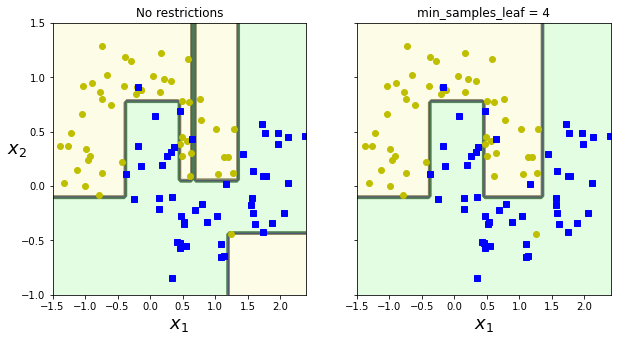

In [10]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

fig, axes = plt.subplots(ncols=2, figsize=(10, 5), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("No restrictions")

plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("min_samples_leaf = 4")
plt.ylabel("")

plt.show()

## 8. 회귀

결정트리는 회귀 문제에서도 사용할 수 있습니다. 사이킷런의 `DecisionTreeRegressor`를 사용해 노이즈가 섞인 2차 함수 형태의 데이터셋에서 `max_depth=2` 설정으로 회귀 트리를 만들어보겠습니다.

In [18]:
# 2차식으로 만든 데이터셋 + 잡음
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [19]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth = 2)
tree_reg.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

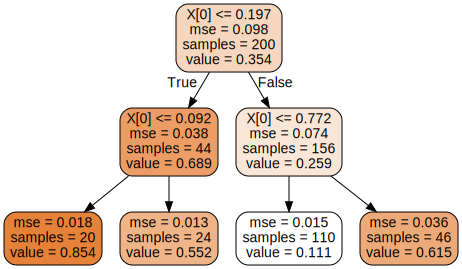

In [20]:
export_graphviz(
    tree_reg,
    out_file = "./regression_tree.dot",
    #feature_names=["x1", "x2"],
    rounded=True,
    filled=True
)

graphviz.Source.from_file("./regression_tree.dot")

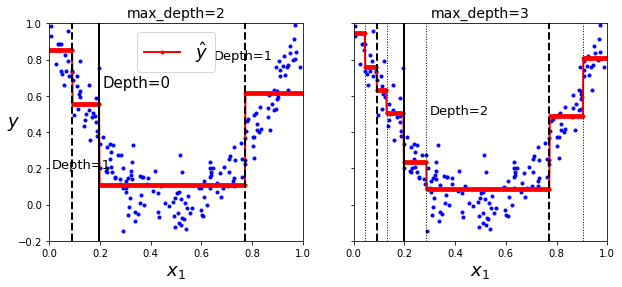

In [21]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

plt.show()

## 9. 불안정성

결정트리는 이해하고 해석하기 쉬우며, 사용하기 편하고, 여러 용도로 사용할 수 있으며, 성능도 뛰어납니다. 하지만 몇가지 제한사항이 있습니다. 눈치챘을지 모르지만 경정트리는 계단 모양의 결정 경계를 만듭니다. 그래서 훈련 세트의 회전에 민감합니다. 이를 해결하는 한 가지 방법은 훈련 데이터를 더 좋은 방향으로 회전시키는 PCA 기법을 사용하는 것입니다.

결정 트리의 주된 문제는 훈련 데이터에 있는 작은 변화에도 매우 민감하다는 것입니다. 


> 요약하기

1. 결정 트리! 가지치기 하는 것.
2. 결정트리 시각화 -> `graphviz` 라이브러리 사용하기
3. 불순도를 측정하는 방법 : 지니불순도, 엔트로피
    - 둘의 차이는 크게 없지만 지니 불순도가 계산하기 좀 더 쉬워서 더 자주 사용된다.
4. 클래스의 확률 추정 : `predict_proba`를 사용
5. 결정트리 학습 방법 : CART 알고리즘. 
6. 계산 복잡도 : $O(n \times m \log(m))$
7. 여러가지 규제 매겨변수들
8. 회귀에 사용하기 : `DecisionTreeRegressor`

### 연습문제도 한번 해볼까!!

1. 백만개의 샘플을 가진 훈련 세트에서 훈련시킨 결정 트리의 깊이는 대략 얼마일까요?
-> $\log_2(백만)$

2. 한 노드의 지니 불순도가 보통 그 부모 노드보다 작을까요 아니면 클까요? 일반적으로 작거나 클까요 아니면 항상 작거나 클까요?
-> 작다. 항상 작다!

3. 결정트리가 훈련 세트에 과대적합 되었다면 `max_depth`를 줄이는 것이 좋을까요?
-> 넹

4. 결정 트리가 훈련 세트에 과소적합 되었다면 입력 특성의 스케일을 조저하는 것이 좋을까요?
-> 결정트리는 스케일에 영향을 받지 않는다.

5. 백만개의 샘플을 가진 훈련 세트에 결정트리를 훈련시키는 데 한시간이 걸렸다면, 천만 개의 샘플을 가진 훈련 세트에 결정트리를 훈련시키는 데는 대력 얼마나 걸릴까요?
-> $O(n \times m \log_2(m))$에서 샘플이 10배 늘어난거라 $O(n \times 10m \log_2(10m))$. $m=10^6$이라고 하면 약 11.7시간 걸린 것!

6. 십만개의 샘플을 가진 훈련 세트가 있다면 `presort=True`로 지정하는 것이 훈련 속도를 높일까요?
-> 샘플의 수가 너무 많다면 정렬한다 하더라도 (`presort=True`로 지정한다 하더라도) 속도에는 변함이 없습니다.

7. moons 데이터셋에 결정 트리를 훈련시키고 세밀하게 튜닝해보세요.

In [34]:
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

# 1. makemoons(n_samples=1000, noise=0.4)를 사용해 데이터셋을 생성합니다.
Xm, ym = make_moons(n_samples=1000, noise = 0.4)

# 2. train_test_split()을 사용해 훈련 세트와 테스트 세트로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(Xm, ym, random_state=42)

# 3. DecisionTreeClassifier의 최적의 매개변수를 찾기 위해 교차 검증과 함께 그리드 탐색을 수행합니다. 
tree_clf = DecisionTreeClassifier()

param_grid = [
    {'max_leaf_nodes' : list(range(2, 100)),
    'max_depth' : list(range(1, 10)),
     'min_samples_split' : [2, 3, 4]
    }
]

grid_search = GridSearchCV(tree_clf, param_grid, cv=5,
                          scoring='accuracy', return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
          

In [35]:
grid_search.best_params_

{'max_depth': 2, 'max_leaf_nodes': 4, 'min_samples_split': 2}

In [36]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=4,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [39]:
from sklearn.metrics import accuracy_score

y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

0.844

84%의 정확도가 나왔네요! 계속 해봅시당. 

8. 랜덤 포레스트를 만들어보세요.

In [41]:
from sklearn.model_selection import ShuffleSplit
from sklearn.base import clone

# 훈련 세트의 서브셋을 1000개 생성합니다. 각각은 무작위로 선택된 100개의 샘플을 담고 있습니다.
shuffle_split = ShuffleSplit(n_splits=1000, test_size=len(X_train) - 100, random_state=42)

mini_sets = []
for mini_train_index, mini_test_index in shuffle_split.split(X_train):
    X_mini_train = X_train[mini_train_index]
    y_mini_train = y_train[mini_train_index]
    mini_sets.append((X_mini_train, y_mini_train))
    
# 앞에서 찾은 최적의 매개변수를 사용해 각 서브셋에 결정 트리를 훈련시킵니다. 테스트세트로 이 1000개의 결정트리를 평가합니다. 
forest = [clone(grid_search.best_estimator_) for _ in range(1000)]

accuracy_scores = []

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    tree.fit(X_mini_train, y_mini_train)
    y_pred = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_pred, y_test))

np.mean(accuracy_scores)

0.820028

In [45]:
# 이제 마술을 부릴 차례입니다. 각 테스트 샘플에 대해 1000개의 결정트리 예측을 만들고 다수로 나온 예측만 취합니다. 
# (사이파이의 mode() 함수를 사용할 수 있습니다.
# 그러면 테스트 세트에 대한 다수결 예측이 만들어집니다.
Y_pred = np.empty([1000, len(X_test)], dtype=np.int8)
Y_pred.shape

(1000, 250)

In [46]:
from scipy.stats import mode

for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(X_test)

y_pred_majority_votes, n_votes = mode(Y_pred, axis=0)

In [47]:
# 테스트 세트에서 이 예측을 평가합니다.
accuracy_score(y_test, y_pred_majority_votes.reshape([-1]))

0.852

조금 늘어났네용 ^^